# This is my notebook for the Nanodegree project1, using the Seattle AirBnB data for Jan'16-Jan17 from Kaggle. Answering below three questions:

### 1) What were the important factors that determined price per night?
### 2) What were the busy periods for the Seattle AirBnBs?
### 3) What was the per night average price during that period ?

## -----------------------------------------------------------------------------------------------------------------


## The notebook needs below libraries:

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [74]:
# read the listings.csv file 
ldf = pd.read_csv("./listings.csv")

In [75]:
#Gather basic info about the dataset read 
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [76]:
# Group the data by neighbourhood_group_cleansed column and count the number of listings available for each combination,
# to find the busiest period by year and month.
popular_neighourhoods = ldf.groupby('neighbourhood_group_cleansed')['id'].count().sort_values(ascending = False)
popular_neighourhoods.head(10)

neighbourhood_group_cleansed
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Name: id, dtype: int64

<AxesSubplot: title={'center': "Seatle AirBnb Popular Neighourhoods Jan'16 - Jan'17"}, xlabel='Neighourhoods', ylabel='Number of Listings'>

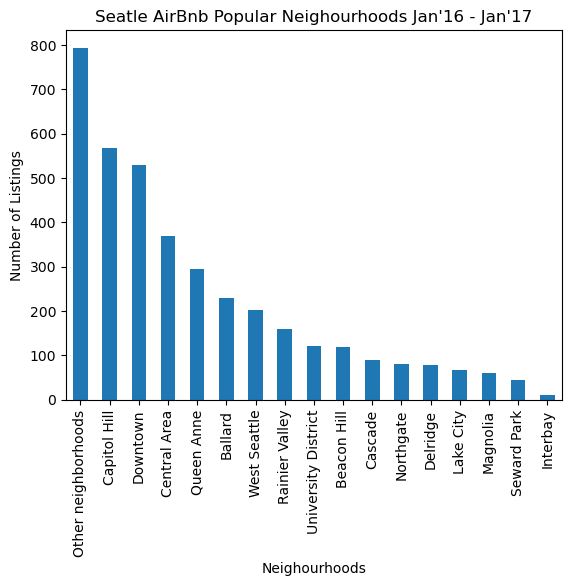

In [77]:
popular_neighourhoods.plot(kind='bar', title="Seatle AirBnb Popular Neighourhoods Jan'16 - Jan'17", 
                           ylabel='Number of Listings', xlabel='Neighourhoods',grid=False, legend=False)

## Let's clean-up the data.

In [78]:
# This function will drop the specified columns from the dataframe and return the modified dataframe.
def drop_columns(df, lst):
    df = df.drop(lst,axis=1)
    return df

In [79]:
# Dropping identifier and test columns which we don't plan to use in the analysis.
lstDropColumns = ['id', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered',
              'neighborhood_overview', 'notes', 'host_id', 'host_url', 'host_name', 'host_verifications',
              'street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code',
              'country', 'latitude', 'longitude', 'square_feet', 'calendar_last_scraped', 'requires_license',
              'license', 'jurisdiction_names', 
              'zipcode','amenities','listing_url', 'host_since','host_location',
              'host_neighbourhood','zipcode','host_since']

ldf0 = drop_columns(ldf,lstDropColumns)

In [80]:
## function to clean numbers by removing non-numeric chars and set missing value to 0
def cleanNumbers(df, lst):
    for col in lst:
        df[col] = df[col].str.replace(r'[^\d.]+', '')
        df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')
    return df

In [81]:
## Some of these columns have $, . or space 
lstNumColumns = ['price', 'monthly_price', 'security_deposit', 'weekly_price', 'cleaning_fee',
                 'extra_people', 'host_response_rate', 'host_acceptance_rate']

ldf1 = cleanNumbers(ldf0, lstNumColumns)
ldf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transit                           2884 non-null   object 
 1   thumbnail_url                     3498 non-null   object 
 2   medium_url                        3498 non-null   object 
 3   picture_url                       3818 non-null   object 
 4   xl_picture_url                    3498 non-null   object 
 5   host_about                        2959 non-null   object 
 6   host_response_time                3295 non-null   object 
 7   host_response_rate                3295 non-null   float32
 8   host_acceptance_rate              3045 non-null   float32
 9   host_is_superhost                 3816 non-null   object 
 10  host_thumbnail_url                3816 non-null   object 
 11  host_picture_url                  3816 non-null   object 
 12  host_l

C:\Users\Admin\AppData\Local\Temp\ipykernel_16772\2388450066.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\d.]+', '')


In [82]:
# This function will iterate over the given columns and for each column, it will check if the value is not null or 
# not empty, if it's not then it will replace it with "y" otherwise "n" to indicate present or absense.

def convert_to_indicator(df,lst):
    for column in lst:
        df[column] = df[column].apply(lambda x: "y" if x else "n")
    return df

In [83]:
# Create indicator columns
lstIndColumns =  ['transit', 'thumbnail_url', 'medium_url', 'picture_url',
           'xl_picture_url', 'host_about', 'host_thumbnail_url', 'host_picture_url']
ldf2 = convert_to_indicator(ldf1,lstIndColumns)
ldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transit                           3818 non-null   object 
 1   thumbnail_url                     3818 non-null   object 
 2   medium_url                        3818 non-null   object 
 3   picture_url                       3818 non-null   object 
 4   xl_picture_url                    3818 non-null   object 
 5   host_about                        3818 non-null   object 
 6   host_response_time                3295 non-null   object 
 7   host_response_rate                3295 non-null   float32
 8   host_acceptance_rate              3045 non-null   float32
 9   host_is_superhost                 3816 non-null   object 
 10  host_thumbnail_url                3818 non-null   object 
 11  host_picture_url                  3818 non-null   object 
 12  host_l

In [84]:
## This function will iterate over the given columns and for each column, it will replace the blank values with "n/a"
def replace_blanks(df,lst):
    for column in lst:
        df[column] = df[column].replace('', 'n/a')
    return df

In [85]:
lstBlankColumns= ['host_response_rate', 'host_acceptance_rate']
ldf3 = replace_blanks(ldf2,lstBlankColumns)
ldf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transit                           3818 non-null   object 
 1   thumbnail_url                     3818 non-null   object 
 2   medium_url                        3818 non-null   object 
 3   picture_url                       3818 non-null   object 
 4   xl_picture_url                    3818 non-null   object 
 5   host_about                        3818 non-null   object 
 6   host_response_time                3295 non-null   object 
 7   host_response_rate                3295 non-null   float32
 8   host_acceptance_rate              3045 non-null   float32
 9   host_is_superhost                 3816 non-null   object 
 10  host_thumbnail_url                3818 non-null   object 
 11  host_picture_url                  3818 non-null   object 
 12  host_l

In [86]:
## This function will replace blanks with 1 in given list of columns
def replace_blanks_host_listings(df, lst):
    for column in lst:
        df[column] = df[column].replace('', 1, inplace=True)
    return df

In [87]:
# This function will iterate over the given columns and for each column,it will create dummy variables and concatenate 
# them to the dataframe and drop the original column.

def convert_to_dummies(df,lst):
    for column in lst:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop([column], axis=1)
    return df

In [88]:
lstDummyColumns4 = ['host_response_time',  'property_type', 'room_type', 
            'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included', 
            'extra_people', 'calendar_updated',   
            'cancellation_policy','transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_about',
           'host_thumbnail_url', 'host_picture_url' ]

ldf6 = convert_to_dummies(ldf3,lstDummyColumns4)

# 'minimum_nights','maximum_nights','availability_30', 'availability_60', 'availability_90', 'availability_365',
# 'calculated_host_listings_count','host_listings_count', 'host_total_listings_count'
# 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact','has_availability',
# 'instant_bookable','require_guest_profile_picture', 'require_guest_phone_verification', 

In [89]:
ldf6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 216 entries, host_response_rate to host_picture_url_y
dtypes: float32(7), float64(10), int64(8), object(12), uint8(179)
memory usage: 1.6+ MB


## The number of columns increased to 216.

In [90]:
## This function will create a new column "number_of_reviews_binned" and it will create the bins of steps of 10 
# and then create dummy columns for the bins.

def create_reviews_dummies(df):
    df["number_of_reviews_binned"]= pd.cut(df["number_of_reviews"],bins=range(0, 100, 10), right=False, labels=range(0, 9))
    dummies = pd.get_dummies(
        df["number_of_reviews_binned"], prefix="number_of_reviews")
    df = pd.concat([df, dummies], axis=1)
    df.drop(["number_of_reviews", "number_of_reviews_binned"],
            axis=1, inplace=True)
    return df

In [91]:
ldf7 = create_reviews_dummies(ldf6)
ldf7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 224 entries, host_response_rate to number_of_reviews_8
dtypes: float32(7), float64(10), int64(7), object(12), uint8(188)
memory usage: 1.6+ MB


In [92]:
# # This function will create a new column "reviews_per_month_binned" and it will create the bins of steps of 1 
# and then create dummy column for the bins.

def create_reviews_per_month_dummies(df):
    df["reviews_per_month_binned"] = pd.cut(
        df["reviews_per_month"], bins=range(0, 15, 1), right=False, labels=range(0, 14))
    dummies = pd.get_dummies(
        df["reviews_per_month_binned"], prefix="reviews_per_month")
    df = pd.concat([df, dummies], axis=1)
    df.drop(["reviews_per_month", "reviews_per_month_binned"],
            axis=1, inplace=True)
    return df

In [93]:
ldf8 = create_reviews_per_month_dummies(ldf7)
ldf8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 237 entries, host_response_rate to reviews_per_month_13
dtypes: float32(7), float64(9), int64(7), object(12), uint8(202)
memory usage: 1.7+ MB


In [94]:
# This function will create a new column "days_since_first_review" and it will calculate the difference between the 
#"first_review" and today's date. If the first_review is not present then it will assign None to that record.

def create_days_since_first_review_bins(df):
    todey = datetime.now()
    df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
    
    df.loc[df['first_review'].notna(), 'days_since_first_review'] = (todey - df['first_review']).dt.days

    df['days_since_first_review'].fillna(value=np.nan, inplace=True)
    bins = pd.cut(df['days_since_first_review'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160,
                                                  170, 180, 190, 200, np.inf], labels=["0-10", "11-20", "21-30",
                  "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100", "101-110", "111-120", "121-130", 
                  "131-140", "141-150", "151-160", "161-170", "171-180", "181-190", "191-200", "201+"])
    df = pd.concat([df, pd.get_dummies(bins, prefix='days_since_first_review')], axis=1)
    df = df.drop(['days_since_first_review', 'first_review'], axis=1)
    return df

In [95]:
ldf9 = create_days_since_first_review_bins(ldf8)
ldf9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 257 entries, host_response_rate to days_since_first_review_201+
dtypes: float32(7), float64(9), int64(7), object(11), uint8(223)
memory usage: 1.7+ MB


In [96]:
# This function will create a new column "days_since_last_review" and it will calculate the difference between the
# "last_review" and today's date. If the last_review is not present then it will assign None to that record.

def create_days_since_last_review_bins(df):
    todey = datetime.now()
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    
    df.loc[df['last_review'].notna(), 'days_since_last_review'] = (todey - df['last_review']).dt.days

    df['days_since_last_review'].fillna(value=np.nan, inplace=True)
    bins = pd.cut(df['days_since_last_review'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, np.inf], labels=["0-10", "11-20", "21-30",
                  "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100", "101-110", "111-120", "121-130", "131-140", "141-150", "151-160", "161-170", "171-180", "181-190", "191-200", "201+"])
    df = pd.concat(
        [df, pd.get_dummies(bins, prefix='days_since_last_review')], axis=1)
    df = df.drop(['days_since_last_review', 'last_review'], axis=1)
    return df

In [97]:
ldf10 = create_days_since_last_review_bins(ldf9)
ldf10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 277 entries, host_response_rate to days_since_last_review_201+
dtypes: float32(7), float64(9), int64(7), object(10), uint8(244)
memory usage: 1.7+ MB


In [98]:
## This function will set the missing values in the given columns to 0 and create dummy variables.
def replace_missing_review_scores(df,lst):
    for column in lst:
        df[column].fillna(0, inplace=True)
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [99]:
lstNumColumns2 = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
                 "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                 "review_scores_value"]
ldf11 = replace_missing_review_scores(ldf10,lstNumColumns2)
ldf11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 364 entries, host_response_rate to review_scores_value_10.0
dtypes: float32(7), float64(2), int64(7), object(10), uint8(338)
memory usage: 1.9+ MB


In [100]:
## This function will set the missing values in given columns to 0
def replace_missing_fees(df,lst):
    for column in lst:
        df[column].replace('', 0, inplace=True)
        df[column].fillna(0, inplace=True)
    return df

In [101]:
lstNumColumns3= ['security_deposit','cleaning_fee']
ldf12 = replace_missing_fees(ldf11,lstNumColumns3)
ldf12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 364 entries, host_response_rate to review_scores_value_10.0
dtypes: float32(7), float64(2), int64(7), object(10), uint8(338)
memory usage: 1.9+ MB


In [102]:
# This function takes a dataframe as input and sets weekly_price to price*7 if it's missing or blank:
def replace_missing_weekly_price(df):
    df["weekly_price"].fillna(df["price"]*7, inplace=True)
    df["weekly_price"].replace('', np.nan, inplace=True)
    df["weekly_price"].fillna(df["price"]*7, inplace=True)
    return df

In [103]:
ldf13 = replace_missing_weekly_price(ldf12)
ldf13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 364 entries, host_response_rate to review_scores_value_10.0
dtypes: float32(7), float64(2), int64(7), object(10), uint8(338)
memory usage: 1.9+ MB


In [104]:
# # This function takes a dataframe as input and if monthly_price is missing or blank, it set weekly_price to price*30:
def replace_missing_monthly_price(df):
    df["monthly_price"].fillna(df["price"]*30, inplace=True)
    df["monthly_price"].replace('', np.nan, inplace=True)
    df["monthly_price"].fillna(df["price"]*30, inplace=True)
    return df

In [105]:
ldf14 = replace_missing_monthly_price(ldf13)
ldf14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 364 entries, host_response_rate to review_scores_value_10.0
dtypes: float32(7), float64(2), int64(7), object(10), uint8(338)
memory usage: 1.9+ MB


In [106]:
# Save the results to a csv file
ldf14.to_csv('newLDF14.csv', encoding='utf-8')

## At this point, the prepared dataset has 364 columns and 3818 rows.

In [107]:
# This function provides stats on missing values on a given dataframe

def create_missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # data types of those columns with missing values
    mis_dtypes = df[df.isnull()].dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_dtypes, mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'DataTypes', 1: 'Missing Values', 2: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

Your selected dataframe has 57 columns.
There are 26 columns that have missing values.

  BEFORE PREPREOCESSING 
                             DataTypes  Missing Values  % of Total Values
monthly_price                 float32            2301               60.3
security_deposit              float32            1952               51.1
weekly_price                  float32            1809               47.4
cleaning_fee                  float32            1030               27.0
host_acceptance_rate          float32             773               20.2
review_scores_checkin         float64             658               17.2
review_scores_accuracy        float64             658               17.2
review_scores_value           float64             656               17.2
review_scores_location        float64             655               17.2
review_scores_cleanliness     float64             653               17.1
review_scores_communication   float64             651               17.1
review_sco

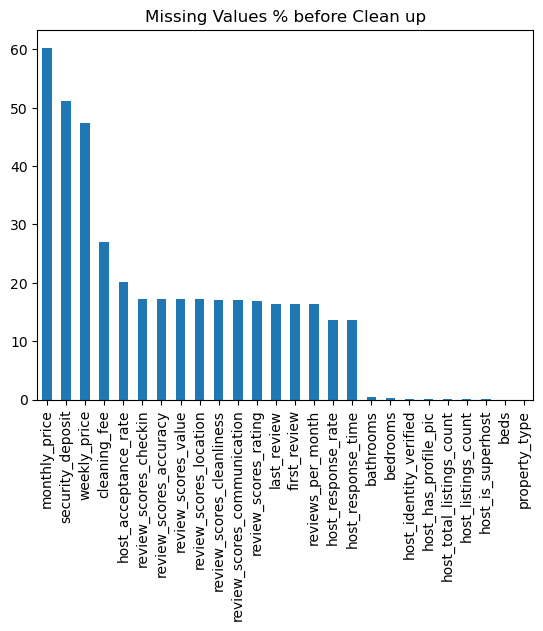

In [108]:
## Report missing values from raw input listings data
missing_values = create_missing_values_table(ldf1)
missing_values["% of Total Values"].plot(kind='bar', title='Missing Values % before Clean up')
print("\n  BEFORE PREPREOCESSING \n", missing_values)

Your selected dataframe has 364 columns.
There are 7 columns that have missing values.

  AFTER PREPREOCESSING 
                           DataTypes  Missing Values  % of Total Values
host_acceptance_rate        float32             773               20.2
host_response_rate          float32             523               13.7
host_is_superhost            object               2                0.1
host_listings_count         float64               2                0.1
host_total_listings_count   float64               2                0.1
host_has_profile_pic         object               2                0.1
host_identity_verified       object               2                0.1


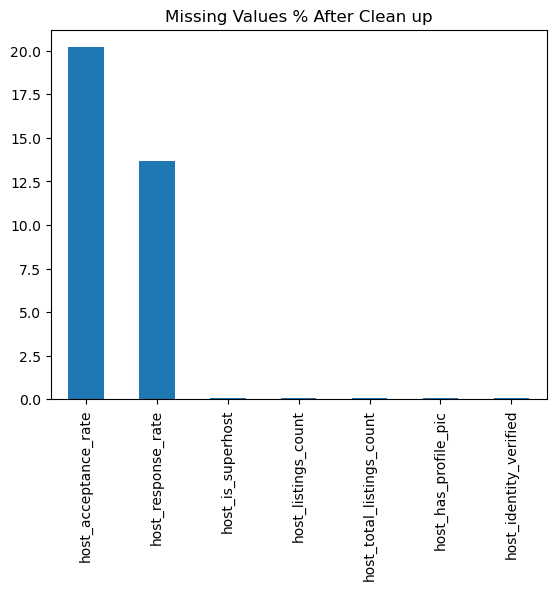

In [109]:
## Report missing values after preprocessing and clean up of the listings data
missing_values = create_missing_values_table(ldf14)
missing_values["% of Total Values"].plot(kind='bar', title='Missing Values % After Clean up')
print("\n  AFTER PREPREOCESSING \n", missing_values)

In [110]:
## drop rows with missing value 
ldf15 = ldf14.dropna(inplace=False, axis=0)
ldf15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3814
Columns: 364 entries, host_response_rate to review_scores_value_10.0
dtypes: float32(7), float64(2), int64(7), object(10), uint8(338)
memory usage: 1.5+ MB


## Now let's try to find most important columns that can predict daily price:

In [111]:
# This function uses feature importance from Linear Regressor to identify the top n columns that are most important for 
# predicting the 'price'; returns a list of the column names corresponding to the selected columns.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_important_columns(df, responseCol="", featureKnt=10):
    X = df.drop(responseCol, axis=1)
    y = df[responseCol]
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=featureKnt)
    rfe.fit(X, y)
    return X.columns[rfe.support_]

In [112]:
# Function to keep only numeric columns in a given datafram for regression analysis
def keep_numeric_columns(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    return df[numeric_columns]

In [113]:
numeric_columns = ldf15.select_dtypes(include=[np.number]).columns.tolist()
print ("Number of Numeric columns = " , len(numeric_columns))

Number of Numeric columns =  354


In [114]:
ldf15.info()

ldf16 = keep_numeric_columns(ldf15)
## dropped require_guest_profile_picture_f since in the regression both *picture_t and *_picture_f showed up
print("-------After dropping nonnumeric columns:------")
ldf16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3814
Columns: 364 entries, host_response_rate to review_scores_value_10.0
dtypes: float32(7), float64(2), int64(7), object(10), uint8(338)
memory usage: 1.5+ MB
-------After dropping nonnumeric columns:------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3814
Columns: 354 entries, host_response_rate to review_scores_value_10.0
dtypes: float32(7), float64(2), int64(7), uint8(338)
memory usage: 1.3 MB


# Let's see what are the 20 important predictors  for the price.

In [115]:
numPredictors = 30
importantPredictors= select_important_columns(ldf16,"price",numPredictors)

In [116]:
print("Top ", numPredictors, " Important Predictors of Price are:\n" , list(importantPredictors))


Top  30  Important Predictors of Price are:
 ['accommodates_16', 'beds_1.0', 'beds_2.0', 'beds_3.0', 'beds_4.0', 'beds_5.0', 'beds_6.0', 'beds_7.0', 'beds_8.0', 'beds_9.0', 'guests_included_0', 'guests_included_1', 'guests_included_2', 'guests_included_3', 'guests_included_4', 'guests_included_5', 'guests_included_6', 'guests_included_7', 'guests_included_8', 'guests_included_9', 'guests_included_10', 'guests_included_11', 'guests_included_12', 'guests_included_13', 'extra_people_68.0', 'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'reviews_per_month_0', 'days_since_last_review_201+']


## Let's use these predictors to get the linear regression model details

In [117]:
## lets use these predictors to get the model details
import statsmodels.api as sm

#define predictor variables
X = ldf16[importantPredictors]

#define response variable
y = ldf16["price"]

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model1 = sm.OLS(y, X).fit()

#view model summary
print(model1.summary())

## reference https://www.statology.org/sklearn-linear-regression-summary/

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     94.09
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:14:16   Log-Likelihood:                -16769.
No. Observations:                3027   AIC:                         3.359e+04
Df Residuals:                    3000   BIC:                         3.375e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Above model summary shows R-squared of 0.229 close to Adj. R-squared of 0.222 indicating number of predictors does not penalize the model.

In [118]:
# Sort the predictors by descending value of the coefficient
sorted_predictors1 = model1.params.sort_values(ascending=False)

# Print the sorted predictors
sorted_predictors1.head(29)

const                           4.239932e+13
cancellation_policy_strict      3.162207e+13
cancellation_policy_moderate    3.162207e+13
cancellation_policy_flexible    3.162207e+13
reviews_per_month_0             1.527191e+01
days_since_last_review_201+    -1.458858e+01
beds_7.0                       -1.246950e+13
beds_9.0                       -1.246950e+13
accommodates_16                -1.246950e+13
beds_5.0                       -1.246950e+13
beds_6.0                       -1.246950e+13
beds_8.0                       -1.246950e+13
beds_4.0                       -1.246950e+13
beds_3.0                       -1.246950e+13
beds_2.0                       -1.246950e+13
beds_1.0                       -1.246950e+13
guests_included_13             -2.454070e+13
extra_people_68.0              -2.454169e+13
guests_included_10             -6.155189e+13
guests_included_9              -6.155189e+13
guests_included_8              -6.155189e+13
guests_included_5              -6.155189e+13
guests_inc

## Let's try another model, LassoCV

In [119]:
# This function first removes the response variable from the list of predictors, then creates the feature matrix X and
# target variable y. It then initializes the LassoCV model with 5-fold cross-validation and normalization. It then fits 
# the model to the data and gets the indices of the non-zero coefficients. Finally, the function returns a list of 
# the predictors with non-zero coefficients.

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

def select_predictors(data, response):
    predictors = data.columns.tolist()
    predictors.remove(response)
    X = data[predictors]
    y = data[response]
    
    # Initialize the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', LassoCV(cv=5, precompute=False))
    ])
    
    # Fit the pipeline to the data
    pipeline.fit(X, y)
    
    # Get the indices of the non-zero coefficients
    nonzero_coef_indices = np.nonzero(pipeline.named_steps['lasso'].coef_)[0]

    # Get the names of the predictors with non-zero coefficients
    nonzero_predictors = [predictors[i] for i in nonzero_coef_indices]

    return nonzero_predictors

In [120]:
predictors_list = select_predictors(ldf16,"price") 
print("Important Predictors by Lasso Cross Validation:\n",predictors_list)

Important Predictors by Lasso Cross Validation:
 ['weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'host_response_time_within an hour', 'room_type_Entire home/apt', 'accommodates_5', 'accommodates_7', 'accommodates_8', 'accommodates_15', 'bathrooms_1.0', 'bathrooms_3.0', 'bedrooms_1.0', 'bedrooms_3.0', 'bedrooms_5.0', 'bedrooms_6.0', 'beds_1.0', 'beds_4.0', 'beds_5.0', 'guests_included_13', 'extra_people_68.0', 'extra_people_80.0', 'extra_people_175.0', 'calendar_updated_5 days ago']


In [121]:
print("Count of Important Predictors by Lasso Cross Validation:\n", len(predictors_list))

Count of Important Predictors by Lasso Cross Validation:
 24


In [122]:
## lets use these predictors to get the model details
import statsmodels.api as sm

#define predictor variables
X = ldf16[predictors_list]

#define response variable
y = ldf16["price"]

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, X).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     2292.
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:14:23   Log-Likelihood:                -13251.
No. Observations:                3027   AIC:                         2.655e+04
Df Residuals:                    3003   BIC:                         2.670e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [123]:
# Sort the predictors by descending value of the coefficient
sorted_predictors2 = model2.params.sort_values(ascending=False)

# Print the sorted predictors
# sorted_predictors2.head(50)


extra_people_68.0                     52.103122
guests_included_13                    52.103122
bedrooms_6.0                          36.321226
bedrooms_5.0                          25.497812
const                                 13.234873
accommodates_7                        10.976227
beds_5.0                               8.635379
accommodates_5                         7.843253
accommodates_8                         7.529682
bathrooms_3.0                          7.459993
beds_4.0                               5.346595
bedrooms_3.0                           5.152434
room_type_Entire home/apt              3.668903
weekly_price                           0.112727
cleaning_fee                           0.013358
security_deposit                       0.006316
monthly_price                          0.004823
beds_1.0                              -0.134401
bedrooms_1.0                          -1.075847
host_response_time_within an hour     -3.264723
bathrooms_1.0                         -3

<AxesSubplot: title={'center': 'Factors Contributing to Average Daily Room Price'}, xlabel='Factors', ylabel='$ Amount'>

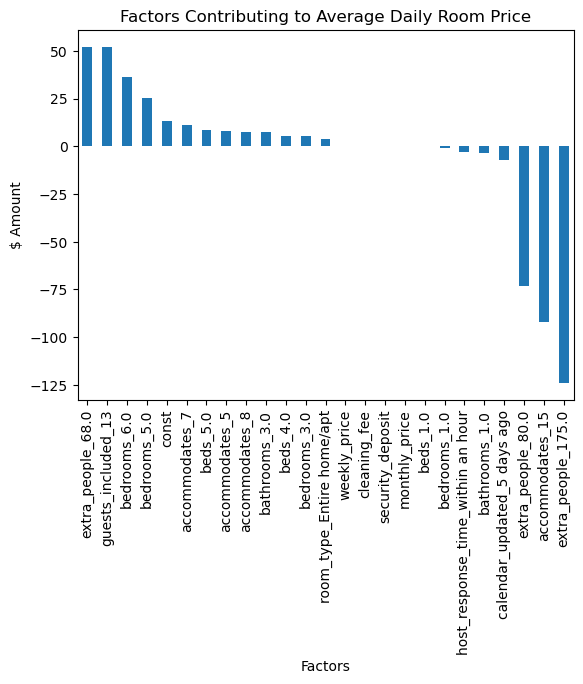

In [127]:
# Chart the Factors Contributing to Average Daily Room Price
sorted_predictors2.plot(kind='bar', title='Factors Contributing to Average Daily Room Price',
                       xlabel = 'Factors', ylabel='$ Amount')

# ============================================================
# Now let's look at the calendar data:

In [128]:
# read the calendar.csv file and print summary info
caldf = pd.read_csv("./calendar.csv")
caldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [129]:
# Report missing values from raw input calendar data
missing_values = create_missing_values_table(caldf)
print("Missing value from Calendar data\n", missing_values)

Your selected dataframe has 4 columns.
There are 1 columns that have missing values.
Missing value from Calendar data
       DataTypes  Missing Values  % of Total Values
price    object          459028               32.9


In [130]:
## clean the price column by removing non-numeric chars
CalNumColumns = ['price']
caldf1 = cleanNumbers(caldf, CalNumColumns)
caldf1.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16772\2388450066.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\d.]+', '')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       934542 non-null   float32
dtypes: float32(1), int64(1), object(2)
memory usage: 37.2+ MB


In [131]:
## since 32% of the rows have NaN price, let's drop those rows
# caldf2 = caldf1.dropna(subset=['price']) actually missing price is only when available =False
caldf2 = caldf1.copy()

In [132]:
## convert date to datetime datatype
caldf3 = caldf2.copy()
caldf3['caldate'] = pd.to_datetime(caldf2['date'])

#Create a new columns for the year, month, day, and month_year
caldf3['year'] = caldf3['caldate'].dt.year
caldf3['month'] = caldf3['caldate'].dt.month
caldf3['day'] = caldf3['caldate'].dt.day
caldf3['month_year'] = caldf3['caldate'].dt.to_period('M')
caldf3.drop('date', axis=1, inplace=True)
caldf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   available   1393570 non-null  object        
 2   price       934542 non-null   float32       
 3   caldate     1393570 non-null  datetime64[ns]
 4   year        1393570 non-null  int64         
 5   month       1393570 non-null  int64         
 6   day         1393570 non-null  int64         
 7   month_year  1393570 non-null  period[M]     
dtypes: datetime64[ns](1), float32(1), int64(4), object(1), period[M](1)
memory usage: 79.7+ MB


In [133]:
## Since the available column only has t and f, let's convert to boolean
caldf3['available'] = caldf3['available'].apply(lambda x: True if x=='t' else False)
caldf3['available'] = caldf3['available'].astype(bool)
caldf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   available   1393570 non-null  bool          
 2   price       934542 non-null   float32       
 3   caldate     1393570 non-null  datetime64[ns]
 4   year        1393570 non-null  int64         
 5   month       1393570 non-null  int64         
 6   day         1393570 non-null  int64         
 7   month_year  1393570 non-null  period[M]     
dtypes: bool(1), datetime64[ns](1), float32(1), int64(4), period[M](1)
memory usage: 70.4 MB


In [134]:
## Since the available column only has t and f, let's convert to boolean
caldf3['availableday'] = caldf3['available'].apply(lambda x: 0 if x else 1)
#caldf3['availableday'] = caldf3['available'].astype(int, )

caldf3['availableday'] = pd.to_numeric(caldf3['availableday'], downcast='float') ## errors='coerce')
    
caldf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   listing_id    1393570 non-null  int64         
 1   available     1393570 non-null  bool          
 2   price         934542 non-null   float32       
 3   caldate       1393570 non-null  datetime64[ns]
 4   year          1393570 non-null  int64         
 5   month         1393570 non-null  int64         
 6   day           1393570 non-null  int64         
 7   month_year    1393570 non-null  period[M]     
 8   availableday  1393570 non-null  float32       
dtypes: bool(1), datetime64[ns](1), float32(2), int64(4), period[M](1)
memory usage: 75.8 MB


In [135]:
##Report missing values from raw input calendar data
missing_values = create_missing_values_table(caldf3)
print(missing_values)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.
      DataTypes  Missing Values  % of Total Values
price   float32          459028               32.9


In [136]:
# Group the data by month_year column and count the number of listings available for each combination,
# to find the busiest period by year and month.

busy_period = caldf3.groupby('month_year')['availableday'].sum().sort_values(ascending = False)
busy_period.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 13 entries, 2016-01 to 2017-01
Freq: M
Series name: availableday
Non-Null Count  Dtype  
--------------  -----  
13 non-null     float32
dtypes: float32(1)
memory usage: 156.0 bytes


In [137]:
print("Busy period for Seattle AirBnbs, available days/month\n", busy_period)

Busy period for Seattle AirBnbs, available days/month
 month_year
2016-01    47665.0
2016-07    44136.0
2016-08    42011.0
2016-04    38503.0
2016-05    38387.0
2016-02    37401.0
2016-06    37296.0
2016-09    37294.0
2016-10    35920.0
2016-03    34420.0
2016-11    32760.0
2016-12    31297.0
2017-01     1938.0
Freq: M, Name: availableday, dtype: float32


<AxesSubplot: title={'center': "Seattle AirBnb Monthly Availability, Jan'16 - Jan'17"}, xlabel='Month-Year', ylabel='Available days'>

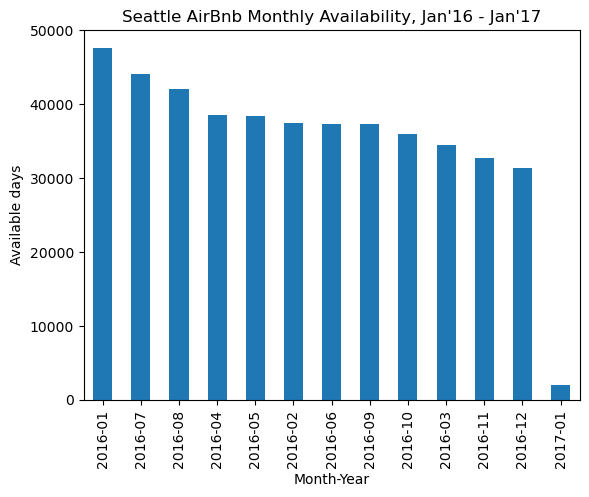

In [138]:
busy_period.plot(kind='bar',xlabel='Month-Year', ylabel='Available days',
                  grid=False, legend=False, 
                 title="Seattle AirBnb Monthly Availability, Jan'16 - Jan'17")

In [139]:
# Calculate monthly aevrage price for the availabe period
mean_price_table = caldf3.groupby('month_year')['price'].mean()  

# calculate the average price
average_price = caldf3['price'].mean()

mean_price_table.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 13 entries, 2016-01 to 2017-01
Freq: M
Series name: price
Non-Null Count  Dtype  
--------------  -----  
13 non-null     float32
dtypes: float32(1)
memory usage: 156.0 bytes


In [140]:
# Drop time period with no price data

caldf4_mpt = mean_price_table.dropna()

In [141]:
# Review the monthly aevrage price for the availabe period
caldf4_mpt.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 13 entries, 2016-01 to 2017-01
Freq: M
Series name: price
Non-Null Count  Dtype  
--------------  -----  
13 non-null     float32
dtypes: float32(1)
memory usage: 156.0 bytes


<AxesSubplot: title={'center': "Seatle AirBnb Price Trend Jan'16 - Jan'17"}, xlabel='Month', ylabel='Monthly Average Price'>

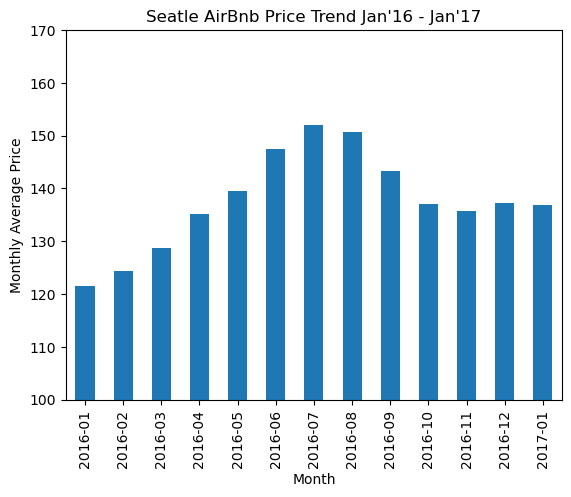

In [142]:
# Plot bar chart for monthly average price over available period
list_ylim = (100.00, 170.00)
caldf4_mpt.plot(kind='bar',y='mean_price', x='month', xlabel='Month', ylabel='Monthly Average Price', 
                ylim=list_ylim, grid=False, legend=False, 
                title="Seatle AirBnb Price Trend Jan'16 - Jan'17")

<AxesSubplot: title={'center': "Seatle AirBnb Price Trend Jan'16 - Jan'17"}, xlabel='Month', ylabel='Monthly Average Price'>

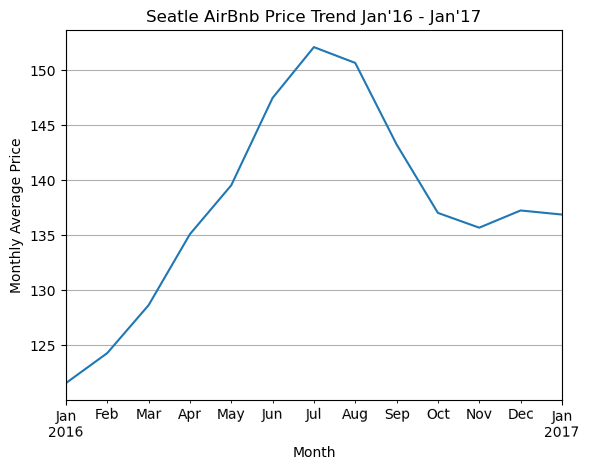

In [146]:
# Plot line chart for monthly average price over available period
caldf4_mpt.plot(kind='line', x='month', y='mean_price', xlabel='Month', ylabel='Monthly Average Price',  grid='True',
                legend=False,rot=1,  title="Seatle AirBnb Price Trend Jan'16 - Jan'17")


In [144]:
busiest_month = caldf4_mpt.idxmax()
print("Busiest Month for Seattle AirBnbs was ", busiest_month)

Busiest Month for Seattle AirBnbs was  2016-07


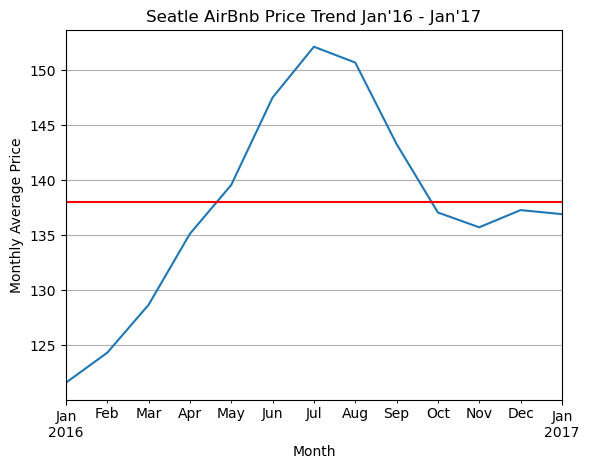

In [148]:
# plot the mean_price_table
caldf4_mpt.plot(kind='line', x='month', y='mean_price', xlabel='Month', ylabel='Monthly Average Price',  grid='False',
                legend=False, title="Seatle AirBnb Price Trend Jan'16 - Jan'17")

# add the average price line to the existing plot
plt.axhline(y=average_price, color='r', linestyle='-')
plt.show()
plt.text(11.5, average_price, 'Average price', color = 'green', rotation=0)
plt.show()